# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

## 0. 데이터 불러오기

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocessing / EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
# Gender에 NaN이 아닌 결측치는 없는지 확인
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

<Axes: ylabel='Gender'>

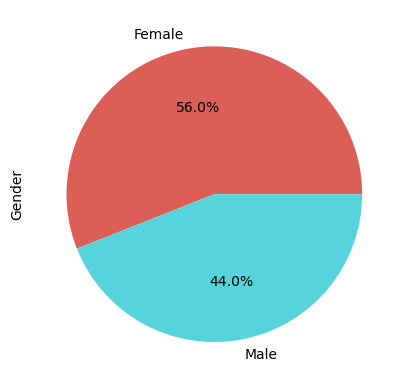

In [6]:
# Gender 비율 확인하기
df["Gender"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("hls", 2))

<Axes: xlabel='Age', ylabel='Count'>

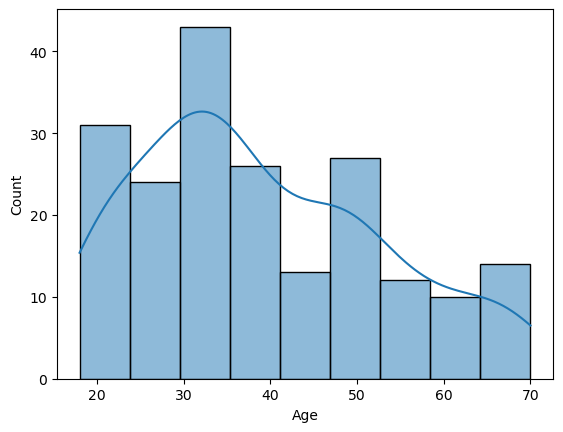

In [7]:
# Age 분포 확인하기
sns.histplot(df["Age"], kde=True)

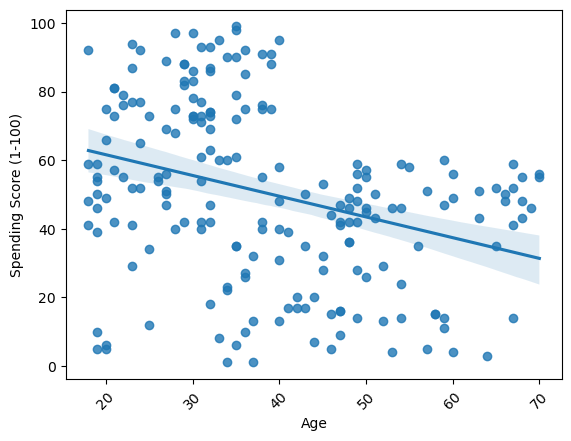

In [8]:
# Age와 Spending Score 사이에 선형관계가 있는지 확인하기
sns.regplot(data=df, x="Age", y="Spending Score (1-100)")
plt.xticks(rotation=45)
plt.show()

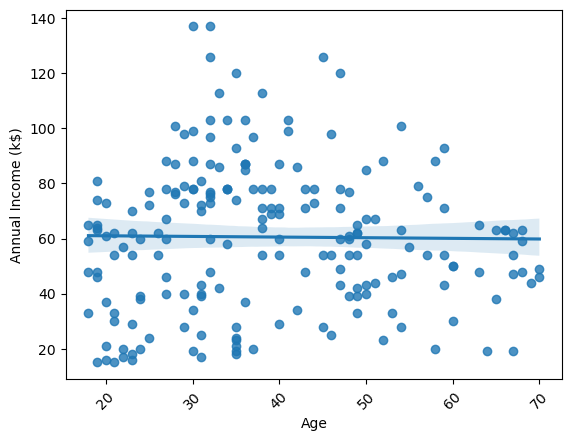

In [9]:
# Age와 Annual Income 사이에 선형관계가 있는지 확인하기
sns.regplot(data=df, x="Age", y="Annual Income (k$)")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

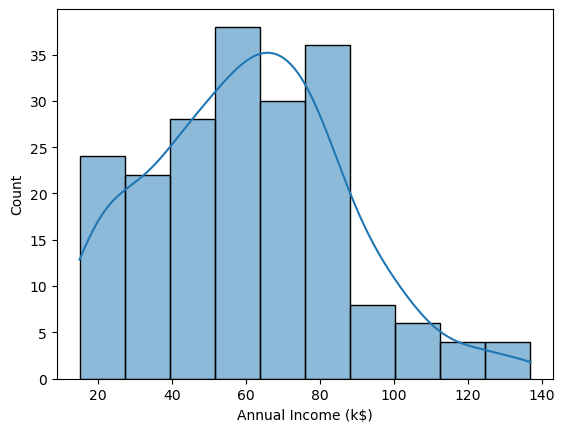

In [10]:
# Annual Income 분포 확인하기
sns.histplot(df["Annual Income (k$)"], kde=True)

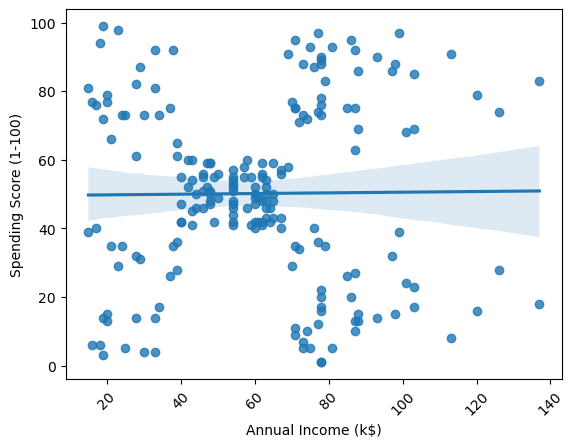

In [11]:
# Annual Income과 Spending Score 사이에 선형관계가 있는지 확인하기
sns.regplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.xticks(rotation=45)
plt.show()

선형관계는 없지만 특정한 모양으로 뭉쳐있는 모습을 확인할 수 있습니다.

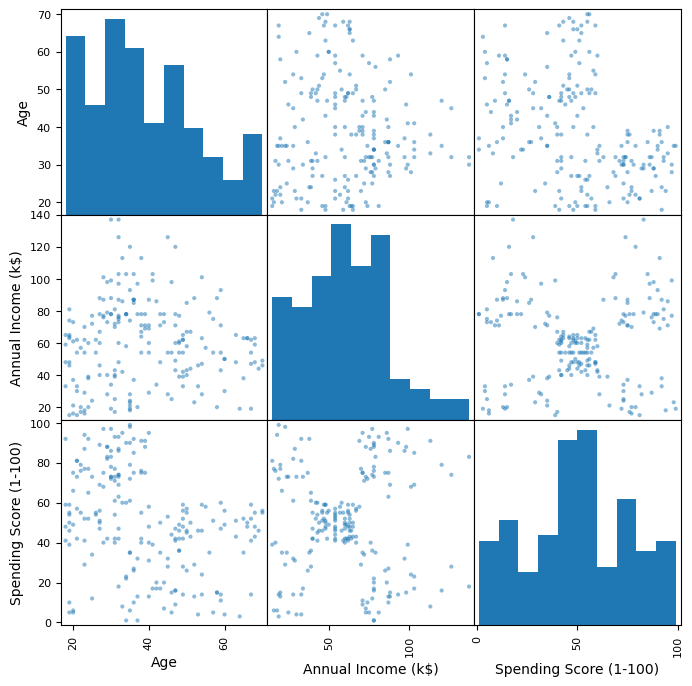

In [12]:
# 모든 feature끼리의 scatterplot 확인하기
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(8, 8))
plt.show()

In [13]:
# Gender 수치화
df["Gender"].replace({"Male": 0, "Female": 1}, inplace=True)

In [14]:
scaled_df = pd.DataFrame(StandardScaler().fit_transform(df))
scaled_df.columns = df.columns

## 2. Clustering

In [15]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [16]:
scaled_kmeans = KMeans(n_clusters=5)
scaled_kmeans.fit(scaled_df)

/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [17]:
dbscan = DBSCAN(eps=10, min_samples=2)
dbscan.fit(df)

DBSCAN(eps=10, min_samples=2)

In [18]:
scaled_dbscan = DBSCAN(eps=0.5, min_samples=2)
scaled_dbscan.fit(scaled_df)

DBSCAN(min_samples=2)

## 3. Evaluation

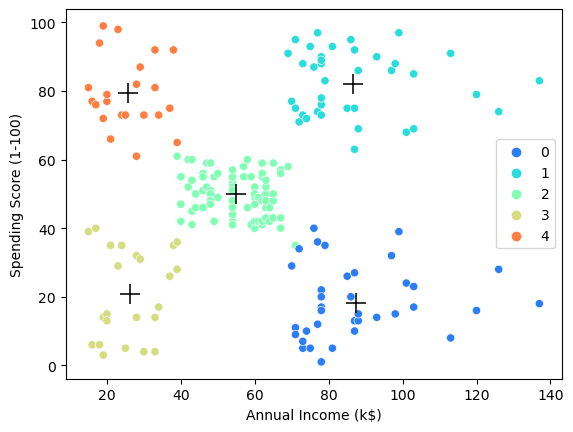

In [19]:
# Annual Income, Spending Score 바탕 K-Means Clustering 결과 보기
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=kmeans.labels_, palette=sns.color_palette("rainbow", 5))
sns.scatterplot(x=kmeans.cluster_centers_[:, 2], y=kmeans.cluster_centers_[:, 3], marker="+", s=200, color="black")
plt.show()

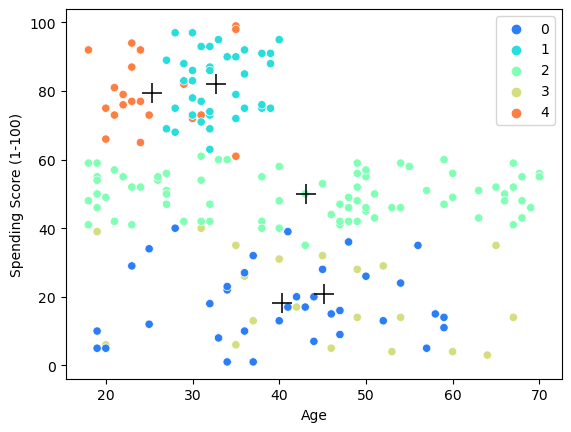

In [20]:
# Age, Spending Score 바탕 K-Means Clustering 결과 보기
sns.scatterplot(x=df["Age"], y=df["Spending Score (1-100)"], hue=kmeans.labels_, palette=sns.color_palette("rainbow", 5))
sns.scatterplot(x=kmeans.cluster_centers_[:, 1], y=kmeans.cluster_centers_[:, 3], marker="+", s=200, color="black")
plt.show()

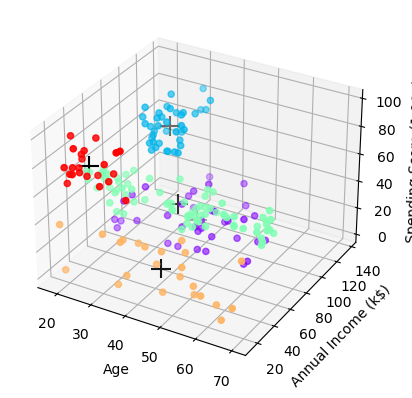

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=kmeans.labels_, cmap="rainbow")
ax.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker="+", s=200, c="black")

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

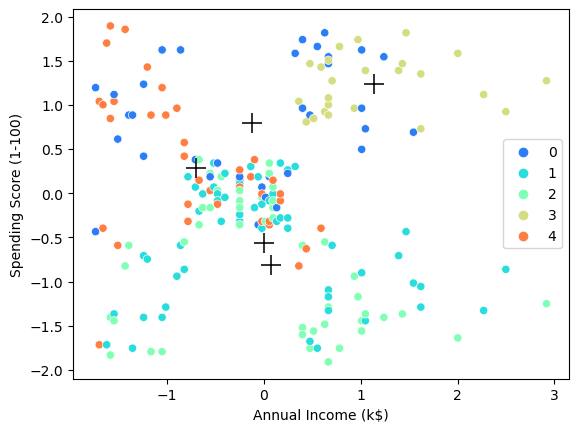

In [22]:
# Annual Income, Spending Score 바탕 K-Means Clustering 결과 보기
sns.scatterplot(x=scaled_df["Annual Income (k$)"], y=scaled_df["Spending Score (1-100)"], hue=scaled_kmeans.labels_, palette=sns.color_palette("rainbow", 5))
sns.scatterplot(x=scaled_kmeans.cluster_centers_[:, 2], y=scaled_kmeans.cluster_centers_[:, 3], marker="+", s=200, color="black")
plt.show()

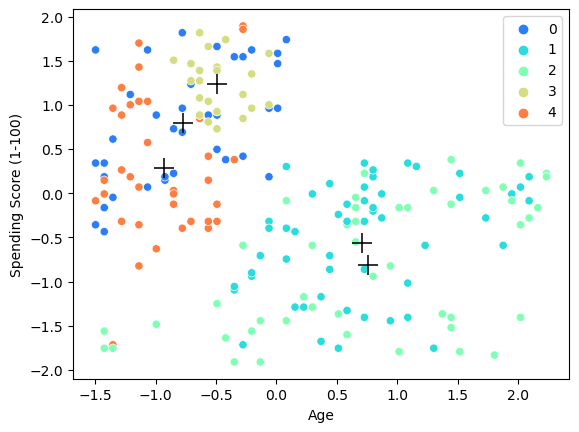

In [23]:
# Age, Spending Score 바탕 K-Means Clustering 결과 보기
sns.scatterplot(x=scaled_df["Age"], y=scaled_df["Spending Score (1-100)"], hue=scaled_kmeans.labels_, palette=sns.color_palette("rainbow", 5))
sns.scatterplot(x=scaled_kmeans.cluster_centers_[:, 1], y=scaled_kmeans.cluster_centers_[:, 3], marker="+", s=200, color="black")
plt.show()

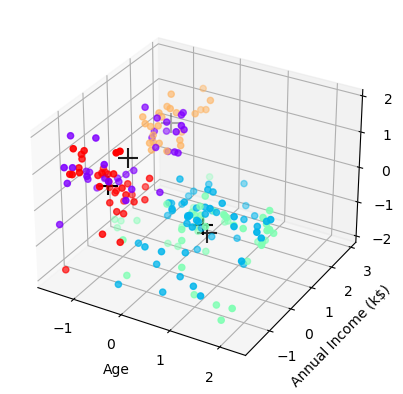

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_df["Age"], scaled_df["Annual Income (k$)"], scaled_df["Spending Score (1-100)"], c=scaled_kmeans.labels_, cmap="rainbow")
ax.scatter(scaled_kmeans.cluster_centers_[:, 1], scaled_kmeans.cluster_centers_[:, 2], scaled_kmeans.cluster_centers_[:, 3], marker="+", s=200, c="black")

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

과연 5가 최적의 클러스터 수인지 확인합니다.

/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/Caskroom/miniconda/base/envs/tobigs-regular-session/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/Caskroom/miniconda/b

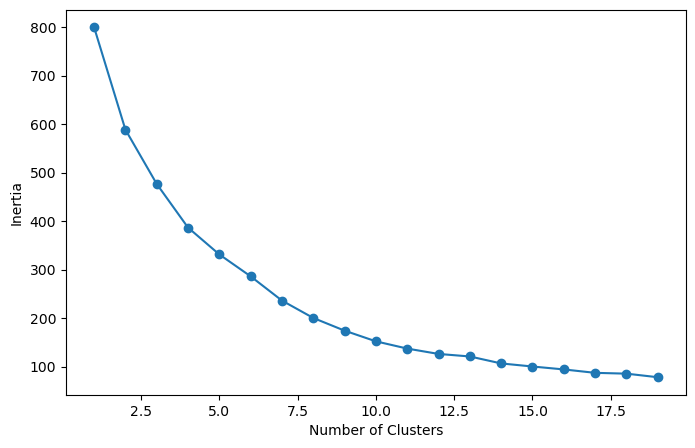

In [25]:
inertia_values = []
for n in range(1, 20):
    kmeans_to_check_elbow = KMeans(n_clusters=n)
    kmeans_to_check_elbow.fit(scaled_df)
    inertia_values.append(kmeans_to_check_elbow.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), inertia_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

/var/folders/cy/05syntbx0bg1y73qt_pm2d7c0000gn/T/ipykernel_54048/3746576480.py:2: UserWarning: 
The palette list has fewer values (6) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=dbscan.labels_, palette=sns.color_palette("rainbow"))


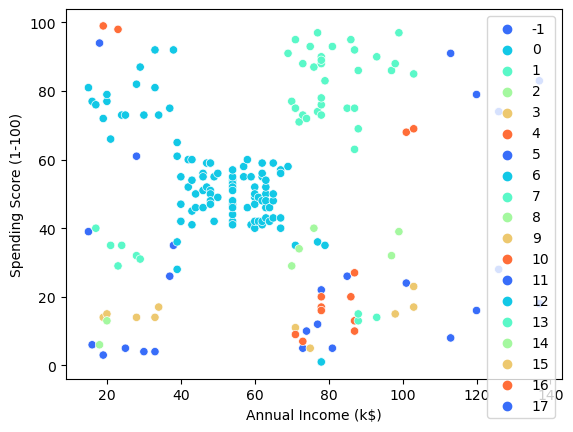

In [26]:
# Annual Income, Spending Score 바탕 DBSCAN 결과 보기
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], hue=dbscan.labels_, palette=sns.color_palette("rainbow"))
plt.show()

/var/folders/cy/05syntbx0bg1y73qt_pm2d7c0000gn/T/ipykernel_54048/2847582335.py:2: UserWarning: 
The palette list has fewer values (6) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=df["Age"], y=df["Spending Score (1-100)"], hue=dbscan.labels_, palette=sns.color_palette("rainbow"))


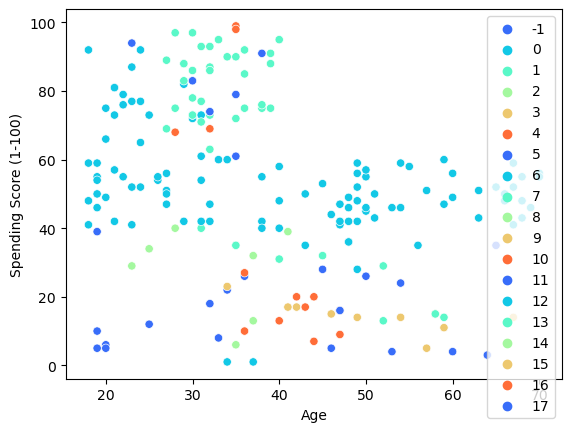

In [27]:
# Age, Spending Score 바탕 K-Means Clustering 결과 보기
sns.scatterplot(x=df["Age"], y=df["Spending Score (1-100)"], hue=dbscan.labels_, palette=sns.color_palette("rainbow"))
plt.show()

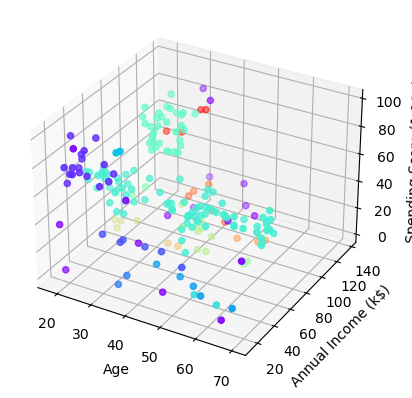

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], c=dbscan.labels_, cmap="rainbow")

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

/var/folders/cy/05syntbx0bg1y73qt_pm2d7c0000gn/T/ipykernel_54048/3898214704.py:2: UserWarning: 
The palette list has fewer values (24) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=scaled_df["Annual Income (k$)"], y=scaled_df["Spending Score (1-100)"], hue=scaled_dbscan.labels_, palette=sns.color_palette("rainbow", 24))


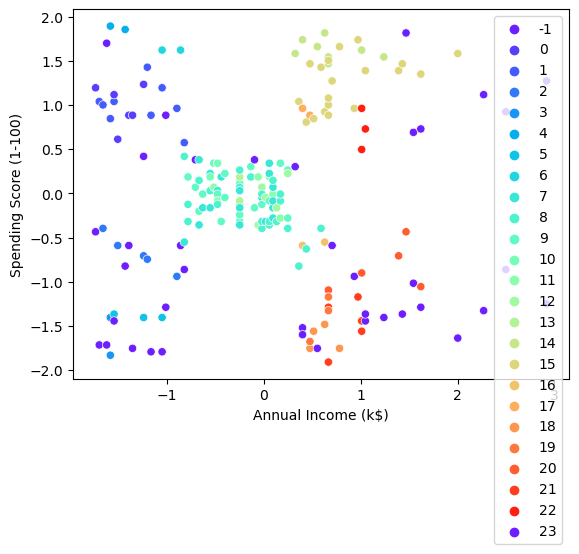

In [29]:
# Annual Income, Spending Score 바탕 DBSCAN 결과 보기
sns.scatterplot(x=scaled_df["Annual Income (k$)"], y=scaled_df["Spending Score (1-100)"], hue=scaled_dbscan.labels_, palette=sns.color_palette("rainbow", 24))
plt.show()

/var/folders/cy/05syntbx0bg1y73qt_pm2d7c0000gn/T/ipykernel_54048/2789842644.py:2: UserWarning: 
The palette list has fewer values (24) than needed (25) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=scaled_df["Age"], y=scaled_df["Spending Score (1-100)"], hue=scaled_dbscan.labels_, palette=sns.color_palette("rainbow", 24))


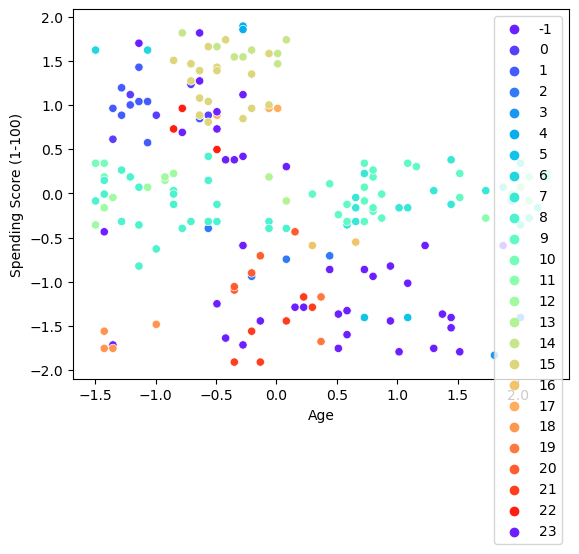

In [30]:
# Age, Spending Score 바탕 DBSCAN 결과 보기
sns.scatterplot(x=scaled_df["Age"], y=scaled_df["Spending Score (1-100)"], hue=scaled_dbscan.labels_, palette=sns.color_palette("rainbow", 24))
plt.show()

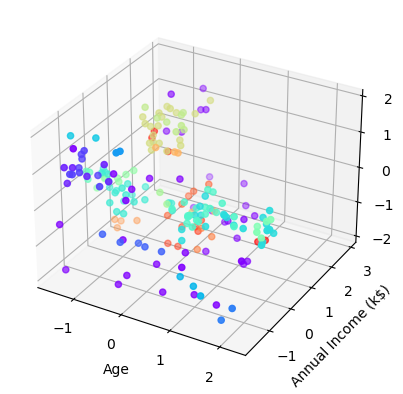

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_df["Age"], scaled_df["Annual Income (k$)"], scaled_df["Spending Score (1-100)"], c=scaled_dbscan.labels_, cmap="rainbow")

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")

plt.show()

Clustering이 제대로 수행된 것 같지 않습니다. \
Silhouette score를 확인합니다.

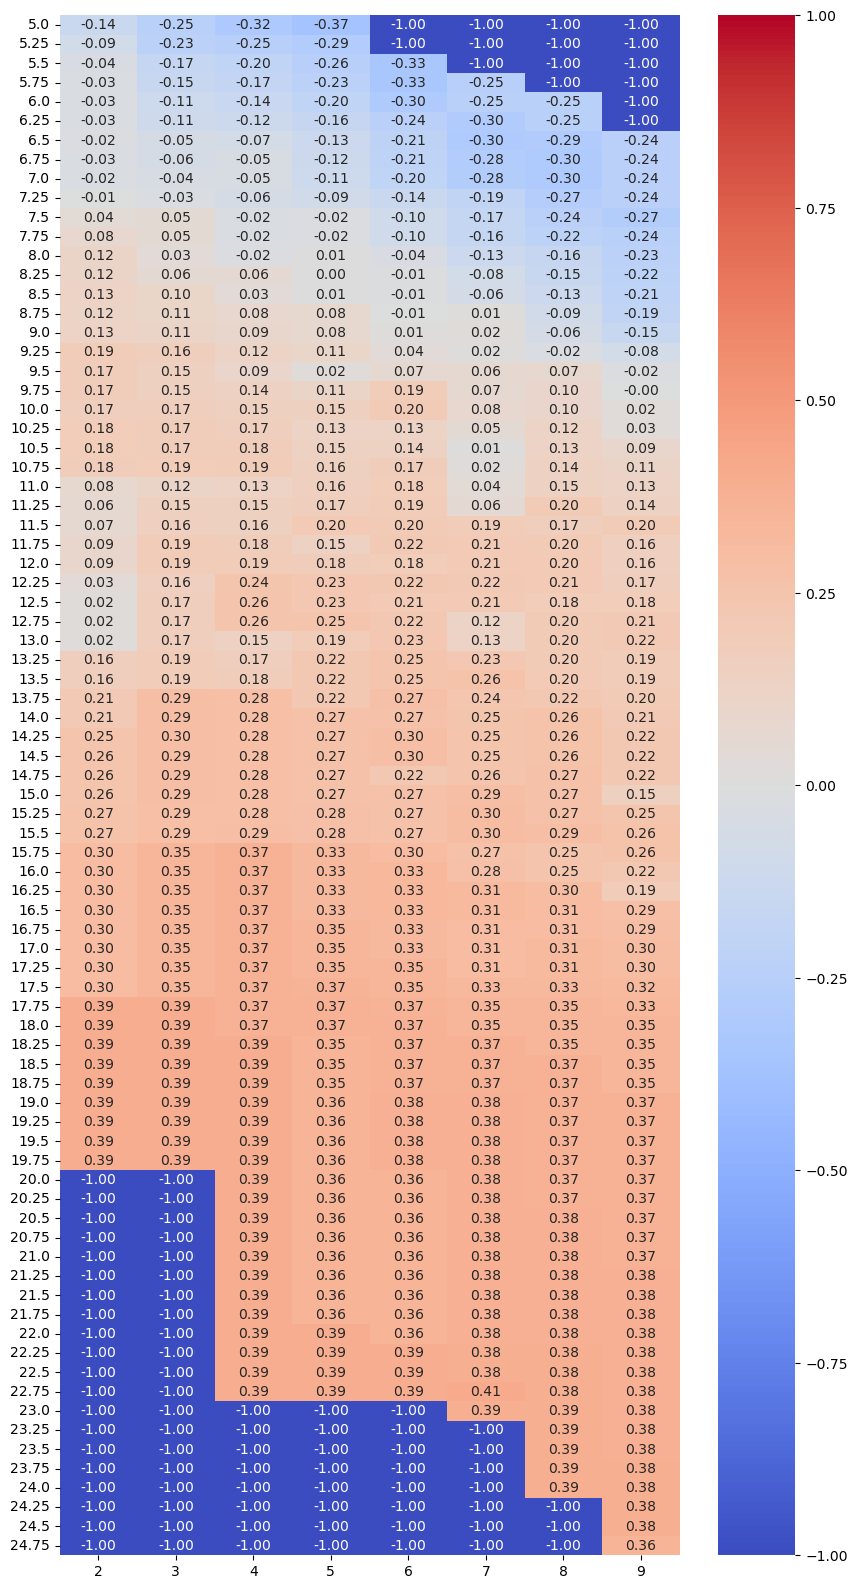

In [32]:
eps = np.arange(5, 25, 0.25)
min_samples = range(2, 10)
silhouette_scores = np.zeros((len(eps), len(min_samples)))
for i, e in enumerate(eps):
    for j, m in enumerate(min_samples):
        dbscan_to_check_silhouette = DBSCAN(eps=e, min_samples=m)
        try:
            silhouette_scores[i, j] = silhouette_score(df, dbscan_to_check_silhouette.fit_predict(df))
        except:
            silhouette_scores[i, j] = -1
plt.figure(figsize=(10, 20))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples, yticklabels=eps, fmt=".2f", vmin=-1., vmax=1., cmap="coolwarm")
plt.show()

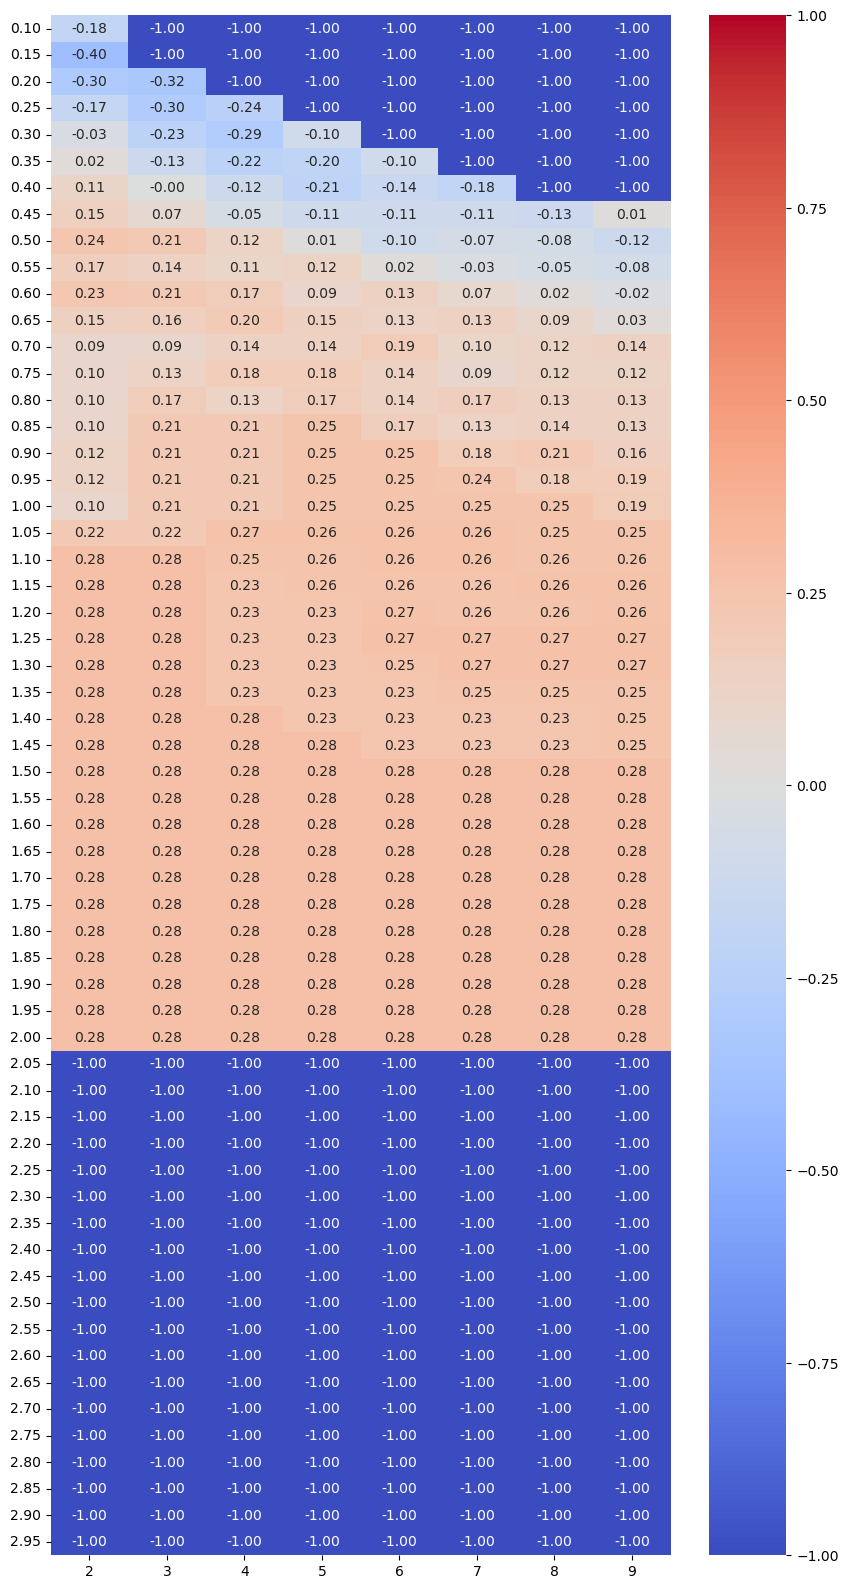

In [33]:
scaled_eps = np.arange(0.1, 3.0, 0.05)
scaled_min_samples = range(2, 10)
scaled_silhouette_scores = np.zeros((len(scaled_eps), len(scaled_min_samples)))
for i, e in enumerate(scaled_eps):
    for j, m in enumerate(scaled_min_samples):
        dbscan_to_check_silhouette = DBSCAN(eps=e, min_samples=m)
        try:
            scaled_silhouette_scores[i, j] = silhouette_score(scaled_df, dbscan_to_check_silhouette.fit_predict(scaled_df))
        except:
            scaled_silhouette_scores[i, j] = -1
plt.figure(figsize=(10, 20))
sns.heatmap(scaled_silhouette_scores, annot=True, xticklabels=scaled_min_samples, yticklabels=[f"{e:.2f}" for e in scaled_eps], fmt=".2f", vmin=-1., vmax=1., cmap="coolwarm")
plt.show()